In [1]:
from lifelines.datasets import load_waltons
df = load_waltons()

df.head()

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137


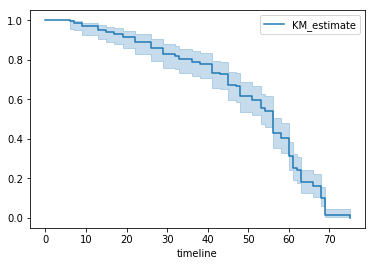

In [3]:
T = df['T'] #survival duration
E = df['E'] #death observed or not
from lifelines import KaplanMeierFitter
%matplotlib inline
kmf = KaplanMeierFitter() # feels like scikit_learn yo~
kmf.fit(T, event_observed=E)
kmf.survival_function_
kmf.cumulative_density_
kmf.median_
kmf.plot_survival_function()

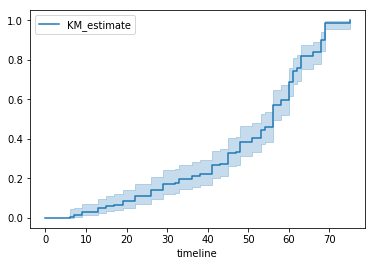

In [4]:
kmf.plot_cumulative_density()

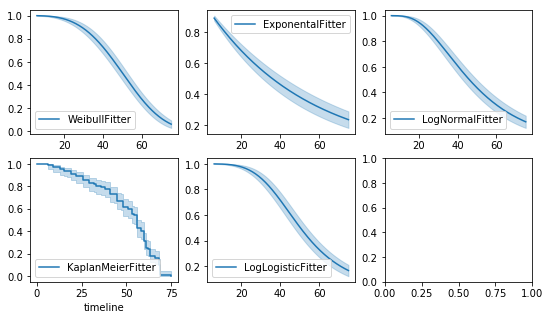

In [16]:
# try many parameteric models
import matplotlib.pyplot as plt
from lifelines import WeibullFitter, ExponentialFitter, LogNormalFitter, LogLogisticFitter, PiecewiseExponentialFitter
fig, axes = plt.subplots(2, 3, figsize=(9, 5))

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')
wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentalFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
#pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter') # this one not working ???

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
#pwf.plot_survival_function(ax=axes[1][2])

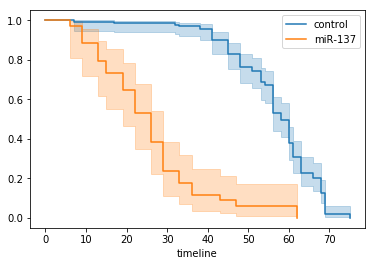

In [18]:
groups = df['group']
ix = (groups == 'miR-137')

kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot()

kmf.fit(T[ix], E[ix], label='miR-137')
ax = kmf.plot(ax=ax)

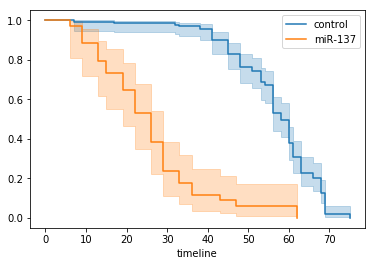

In [19]:
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for name, grouped_df in df.groupby('group'):
    kmf.fit(grouped_df["T"], grouped_df["E"], label=name)
    kmf.plot(ax=ax)

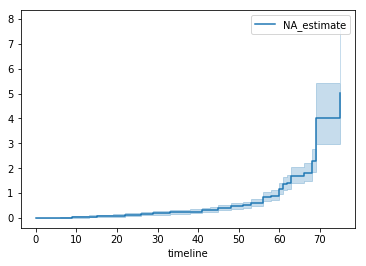

In [21]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(T, event_observed=E)
naf.cumulative_hazard_
naf.plot_cumulative_hazard()

## check my favorite Cox Model

In [23]:
from lifelines.datasets import load_regression_dataset
regression_dataset = load_regression_dataset()

regression_dataset.head()

,var1,var2,var3,T,E
0,0.595170,1.143472,1.571079,14.785652,1
1,0.209325,0.184677,0.356980,7.335846,1
2,0.693919,0.071893,0.557960,5.269797,1
3,0.443804,1.364646,0.374221,11.684092,1
4,1.613324,0.125566,1.921325,7.639492,1


<lifelines.CoxPHFitter: fitted with 200 observations, 11 censored>
      duration col = 'T'
         event col = 'E'
number of subjects = 200
  number of events = 189
    log-likelihood = -807.62
  time fit was run = 2019-03-29 09:11:07 UTC

---
      coef exp(coef)  se(coef)    z      p  -log2(p)  lower 0.95  upper 0.95
var1  0.22      1.25      0.07 2.99 <0.005      8.49        0.08        0.37
var2  0.05      1.05      0.08 0.61   0.54      0.89       -0.11        0.21
var3  0.22      1.24      0.08 2.88 <0.005      7.97        0.07        0.37
---
Concordance = 0.58
Log-likelihood ratio test = 15.54 on 3 df, -log2(p)=9.47


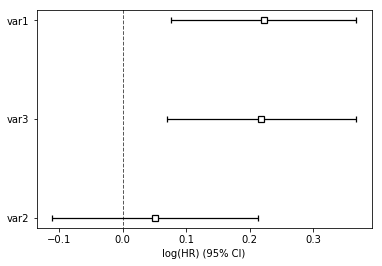

In [26]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(regression_dataset, 'T', event_col='E')
cph.print_summary()
cph.plot()

<lifelines.WeibullAFTFitter: fitted with 200 observations, 11 censored>
      duration col = 'T'
         event col = 'E'
number of subjects = 200
  number of events = 189
    log-likelihood = -501.60
  time fit was run = 2019-03-29 10:25:28 UTC

---
                    coef exp(coef)  se(coef)     z      p  -log2(p)  lower 0.95  upper 0.95
lambda_ var1       -0.11      0.90      0.03 -3.17 <0.005      9.38       -0.17       -0.04
        var2       -0.01      0.99      0.03 -0.27   0.79      0.35       -0.06        0.05
        var3       -0.06      0.95      0.02 -2.70   0.01      7.18       -0.10       -0.02
        _intercept  2.52     12.41      0.05 52.11 <0.005       inf        2.42        2.61
rho_    var1       -0.07      0.94      0.06 -1.08   0.28      1.83       -0.18        0.05
        var2       -0.01      0.99      0.06 -0.18   0.86      0.22       -0.13        0.11
        var3        0.16      1.17      0.06  2.41   0.02      5.96        0.03        0.28
        _inte

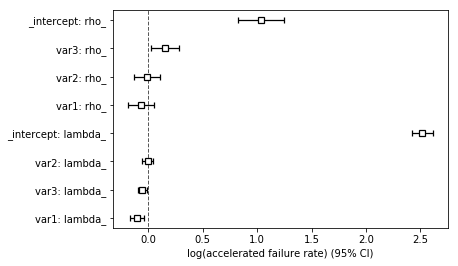

In [28]:
from lifelines import WeibullAFTFitter

wft = WeibullAFTFitter()
wft.fit(regression_dataset, 'T', event_col='E', ancillary_df=regression_dataset)
wft.print_summary()
wft.plot()

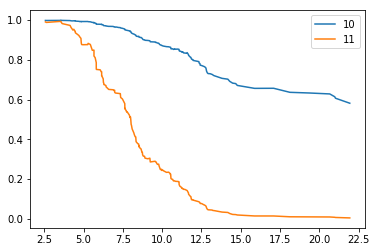

In [33]:
from lifelines import AalenAdditiveFitter
aaf = AalenAdditiveFitter(fit_intercept=False)
aaf.fit(regression_dataset, 'T', event_col='E')
X = regression_dataset.drop(['E', 'T'], axis=1)
aaf.predict_survival_function(X.iloc[10:12]).plot()  # get the unique survival functions of two subjects

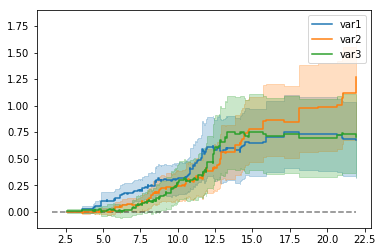

In [34]:
aaf.plot()

Index(['week', 'arrest', 'fin', 'age', 'race', 'wexp', 'mar', 'paro', 'prio'], dtype='object')
Iteration 1: norm_delta = 0.50881, step_size = 0.9500, ll = -675.38063, newton_decrement = 16.76434, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.13852, step_size = 0.9500, ll = -659.79004, newton_decrement = 0.99157, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.01802, step_size = 0.9500, ll = -658.76197, newton_decrement = 0.01422, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.00108, step_size = 1.0000, ll = -658.74771, newton_decrement = 0.00005, seconds_since_start = 0.0
Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -658.74766, newton_decrement = 0.00000, seconds_since_start = 0.0
Convergence completed after 5 iterations.
<lifelines.CoxPHFitter: fitted with 432 observations, 318 censored>
      duration col = 'week'
         event col = 'arrest'
number of subjects = 432
  number of events = 114
    log-likelihood = -658.75
  time fit was run = 2019-0

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


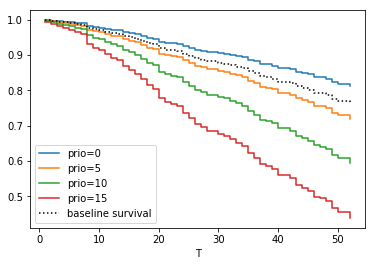

In [22]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

rossi_dataset = load_rossi()
print(rossi_dataset.columns)
cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col = 'week', event_col = 'arrest', show_progress = True)

cph.print_summary()

cph.plot_covariate_groups('prio', [0,5,10,15])
rossi_dataset.head()

In [14]:
cph.baseline_cumulative_hazard_

,baseline hazard
T,
1.0,0.001958
2.0,0.003922
3.0,0.005887
4.0,0.007856
5.0,0.009832
6.0,0.011816
7.0,0.013810
8.0,0.023800
9.0,0.027853


In [8]:
% matplotlib inline
from lifelines.datasets import load_regression_dataset
import matplotlib.pyplot as plt
df = load_regression_dataset()
df.head()

,var1,var2,var3,T,E
0,0.595170,1.143472,1.571079,14.785652,1
1,0.209325,0.184677,0.356980,7.335846,1
2,0.693919,0.071893,0.557960,5.269797,1
3,0.443804,1.364646,0.374221,11.684092,1
4,1.613324,0.125566,1.921325,7.639492,1


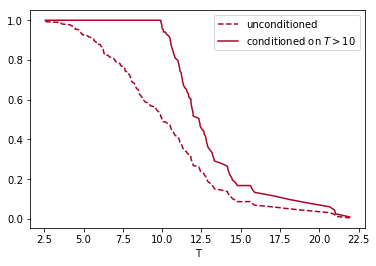

In [9]:
cph = CoxPHFitter().fit(df, 'T', 'E')
censored_subjects = df.loc[df['E'] == 0]
unconditioned_sf = cph.predict_survival_function(censored_subjects)

conditioned_sf = unconditioned_sf.apply(lambda c:(c / c.loc[df.loc[c.name, 'T']]).clip_upper(1))

subject = 13

unconditioned_sf[subject].plot(ls="--", color="#A60628", label="unconditioned")
conditioned_sf[subject].plot(color="#A60628", label="conditioned on $T>10$")
plt.legend()

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def Standard_Scale(arr_in):
    scaler = StandardScaler()
    scaler.fit(arr_in)
    return scaler.transform(arr_in)

img_feature_LBP = Standard_Scale(np.loadtxt('image_features_LBP.txt'))
img_feature_GLCM = Standard_Scale(np.loadtxt('image_features_GLCM.txt'))
img_feature_gabor = Standard_Scale(np.loadtxt('image_feature_gabor.txt'))
img_feature_HOG = Standard_Scale(np.loadtxt('image_feature_HOG.txt'))
print(img_feature_LBP.shape)
survival_val_train = np.loadtxt('survival_info.txt')
censored_val_train = np.loadtxt('censored.txt')
risk_logits = np.loadtxt('estimated_risk.txt')

(1505, 256)


In [2]:
num_cases_train = 1239
num_cases_test = 266

all_patients_data = np.concatenate((img_feature_LBP, survival_val_train.reshape((-1,1)), (1-censored_val_train).reshape(-1,1)), axis=1)
make_col = ['var%d'%(i+1) for i in range(0, 256)]
make_col = make_col + ['survival days', 'observed']

all_patients_df = pd.DataFrame(data = all_patients_data, columns=make_col)
all_patients_df.head()

#events = all_patients_df['observed'].astype(bool)
#print(all_patients_df.loc[events, 'var105'].var())
#print(all_patients_df.loc[~events, 'var105'].var())

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(all_patients_df['survival days'].loc[all_patients_df['observed'] == 1], all_patients_df['observed'].loc[all_patients_df['observed'] == 1])
kmf.plot_survival_function()
kmf.survival_function_
kmf.median_

print(kmf.survival_function_at_times(422.0))



422.0    0.496464
Name: KM_estimate, dtype: float64


In [14]:
def eval_CI(Risk, T, C):
    """
    get performance evaluation.
    """
    def c_index_score_orderable(Risk, T, C):
        """
        Calculate concordance index to evaluate model prediction.
        C-index calulates the fraction of all pairs of subjects whose predicted
        survival times are correctly ordered among all subjects that can actually be ordered, i.e.
        both of them are uncensored or the uncensored time of one is smaller than
        the censored survival time of the other.


        Parameters
        ----------
        Risk: numpy.ndarray
           m sized array of predicted risk (do not confuse with predicted survival time!)
        T: numpy.ndarray
           m sized vector of time of death or last follow up
        C: numpy.ndarray
           m sized vector of censored status (do not confuse with observed status!)

        Returns
        -------
        A value between 0 and 1 indicating concordance index.
        """
        # count orderable pairs
        Orderable = 0.0
        Score = 0.0
        for i in range(len(T)):
            for j in range(i + 1, len(T)):
                if (C[i] == 0 and C[j] == 0):
                    Orderable = Orderable + 1
                    if (T[i] > T[j]):
                        if (Risk[j] > Risk[i]):
                            Score = Score + 1
                    elif (T[j] > T[i]):
                        if (Risk[i] > Risk[j]):
                            Score = Score + 1
                    else:
                        if (Risk[i] == Risk[j]):
                            Score = Score + 1
                elif (C[i] == 1 and C[j] == 0):
                    if (T[i] >= T[j]):
                        Orderable = Orderable + 1
                        if (T[i] > T[j]):
                            if (Risk[j] > Risk[i]):
                                Score = Score + 1
                elif (C[j] == 1 and C[i] == 0):
                    if (T[j] >= T[i]):
                        Orderable = Orderable + 1
                        if (T[j] > T[i]):
                            if (Risk[i] > Risk[j]):
                                Score = Score + 1

        return Score, Orderable


    def c_index(score, orderable):
        '''This function gets the score and orderable values and returns the
        c_index value.'''
        return score / orderable

    Score, Orderable = c_index_score_orderable(Risk, T, C)
    return c_index(Score, Orderable)

cut_off_time = 422.0
pn_ratio = np.sum(np.logical_and(censored_val_train==0, survival_val_train<cut_off_time))/np.sum(survival_val_train>cut_off_time)
print(pn_ratio)
cut_off_time = 800
pn_ratio = np.sum(np.logical_and(censored_val_train==0, survival_val_train<cut_off_time))/np.sum(survival_val_train>cut_off_time)
print(pn_ratio)

0.38177874186550975
1.062015503875969


In [38]:

from sklearn import linear_model
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_dict = {'logistic regression': linear_model.LogisticRegression(),
             'LDA': LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage='auto'),
             'QDA': QuadraticDiscriminantAnalysis(reg_param=0.1),
             'SVM': svm.SVC(C=10.0, probability=True),
             'RandomForest': RandomForestClassifier(n_estimators=128, max_depth=8)}

model_name_list = ['logistic regression', 'LDA', 'QDA', 'SVM', 'RandomForest']

cut_time = 422.0

classification_cases_mask_train = np.logical_or(np.logical_and(censored_val_train[0:num_cases_train]==0,
                                                               survival_val_train[0:num_cases_train]<=cut_time),
                                                survival_val_train[0:num_cases_train]>cut_time)
feature_name_list = ['LBP', 'GLCM', 'gabor', 'HOG']

classification_cases_mask_test = np.logical_or(np.logical_and(censored_val_train[num_cases_train:num_cases_train+num_cases_test]==0,
                                                              survival_val_train[num_cases_train:num_cases_train+num_cases_test]<=cut_time),
                                               survival_val_train[num_cases_train:num_cases_train+num_cases_test]>cut_time)

feature_dict_train = {'LBP': img_feature_LBP[0:num_cases_train, :][classification_cases_mask_train, :],
               'GLCM': img_feature_GLCM[0:num_cases_train, :][classification_cases_mask_train, :],
               'gabor': img_feature_gabor[0:num_cases_train, :][classification_cases_mask_train, :],
               'HOG': img_feature_HOG[0:num_cases_train, :][classification_cases_mask_train, :]}

feature_dict_test = {'LBP': img_feature_LBP[num_cases_train:num_cases_train+num_cases_test, :][classification_cases_mask_test, :],
               'GLCM': img_feature_GLCM[num_cases_train:num_cases_train+num_cases_test, :][classification_cases_mask_test, :],
               'gabor': img_feature_gabor[num_cases_train:num_cases_train+num_cases_test, :][classification_cases_mask_test, :],
               'HOG': img_feature_HOG[num_cases_train:num_cases_train+num_cases_test, :][classification_cases_mask_test, :]}
metric_list = ['AUC', 'CI']

X_train = img_feature_LBP[0:num_cases_train, :][classification_cases_mask_train, :]
print(X_train.shape)
Y_train = risk_logits[0:num_cases_train][classification_cases_mask_train]
X_test = img_feature_LBP[num_cases_train:num_cases_train+num_cases_test, :][classification_cases_mask_test, :]
print(X_test.shape)
Y_test = risk_logits[num_cases_train:num_cases_train+num_cases_test][classification_cases_mask_test]
survival_test = survival_val_train[num_cases_train:num_cases_train+num_cases_test][classification_cases_mask_test]

labels_train = survival_val_train[0:num_cases_train][classification_cases_mask_train] >= cut_time
labels_test = survival_val_train[num_cases_train:num_cases_train+num_cases_test][classification_cases_mask_test] >= cut_time
print(np.sum(labels_train))
print("the P/N ratio is:%1.4f"%((np.sum(labels_train) + np.sum(labels_test))/(np.sum(labels_train==0) + np.sum(labels_test==0))))

linear_regression_model_LBP = linear_model.Lasso(0.000000001)
linear_regression_model_LBP.fit(X_train, Y_train)

Y_test_pred = linear_regression_model_LBP.predict(X_test)
print(eval_CI(Y_test_pred, survival_test, np.zeros(shape = survival_test.shape, dtype=np.int32)))
fpr, tpr, thresholds = metrics.roc_curve(labels_test, Y_test_pred, pos_label=0)
print(metrics.auc(fpr, tpr))


clf = linear_model.LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, labels_train)
labels_pred = clf.predict(X_test)
prob_pred = clf.predict_proba(X_test)

fpr, tpr, thresholds = metrics.roc_curve(labels_test, prob_pred[:,1], pos_label=1)
print(metrics.auc(fpr, tpr))

eval_CI(prob_pred[:,0], survival_val_train[num_cases_train:num_cases_train+num_cases_test][classification_cases_mask_test], 
        censored_val_train[num_cases_train:num_cases_train+num_cases_test][classification_cases_mask_test])

for feature in feature_name_list:
    feature_train = feature_dict_train[feature]
    feature_test = feature_dict_test[feature]
    for model_name in model_name_list:
        clf_model = model_dict[model_name]
        clf_model.fit(feature_train, labels_train)
        test_pred_prob = clf_model.predict_proba(feature_test)
        for metrics_name in metric_list:
            if metrics_name == 'AUC':
                fpr, tpr, thresholds = metrics.roc_curve(labels_test, test_pred_prob[:,1], pos_label=1)
                metric_score = metrics.auc(fpr, tpr)
            elif metrics_name == 'CI':
                metric_score = eval_CI(test_pred_prob[:,0], survival_val_train[num_cases_train:num_cases_train+num_cases_test][classification_cases_mask_test],
                        censored_val_train[num_cases_train:num_cases_train+num_cases_test][classification_cases_mask_test])
            print('Using %s in %s obtained %s is %1.4f'%(feature, model_name, metrics_name, metric_score))

(1050, 256)
(228, 256)
771
the P/N ratio is:2.6307
0.6204111600587372
0.7170128148475474
0.7062306672558551


D:\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Using LBP in logistic regression obtained AUC is 0.7071
Using LBP in logistic regression obtained CI is 0.6637
Using LBP in LDA obtained AUC is 0.7067
Using LBP in LDA obtained CI is 0.6606
Using LBP in QDA obtained AUC is 0.7465


D:\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Using LBP in QDA obtained CI is 0.6873
Using LBP in SVM obtained AUC is 0.6972
Using LBP in SVM obtained CI is 0.6366
Using LBP in RandomForest obtained AUC is 0.6987
Using LBP in RandomForest obtained CI is 0.6411
Using GLCM in logistic regression obtained AUC is 0.5411
Using GLCM in logistic regression obtained CI is 0.5245
Using GLCM in LDA obtained AUC is 0.5585
Using GLCM in LDA obtained CI is 0.5425
Using GLCM in QDA obtained AUC is 0.6190
Using GLCM in QDA obtained CI is 0.6041


D:\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Using GLCM in SVM obtained AUC is 0.6117
Using GLCM in SVM obtained CI is 0.5769
Using GLCM in RandomForest obtained AUC is 0.6115
Using GLCM in RandomForest obtained CI is 0.5848
Using gabor in logistic regression obtained AUC is 0.5845
Using gabor in logistic regression obtained CI is 0.5735
Using gabor in LDA obtained AUC is 0.5847
Using gabor in LDA obtained CI is 0.5757

D:\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Using gabor in QDA obtained AUC is 0.6109
Using gabor in QDA obtained CI is 0.5933
Using gabor in SVM obtained AUC is 0.5647
Using gabor in SVM obtained CI is 0.5513
Using gabor in RandomForest obtained AUC is 0.6219
Using gabor in RandomForest obtained CI is 0.5966
Using HOG in logistic regression obtained AUC is 0.6250
Using HOG in logistic regression obtained CI is 0.6001
Using HOG in LDA obtained AUC is 0.6376
Using HOG in LDA obtained CI is 0.6081
Using HOG in QDA obtained AUC is 0.6042
Using HOG in QDA obtained CI is 0.5979
Using HOG in SVM obtained AUC is 0.6254
Using HOG in SVM obtained CI is 0.5983
Using HOG in RandomForest obtained AUC is 0.6513
Using HOG in RandomForest obtained CI is 0.6401


D:\anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


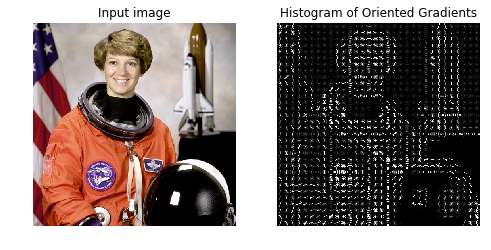

In [1]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = data.astronaut()

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [1]:
# example using SVM with HOG image features
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
% matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

f = open(r'./ship_dataset/shipsnet.json')
dataset = json.load(f)
f.close()

dataset.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

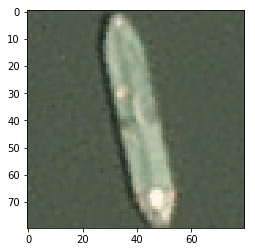

In [2]:
data = np.array(dataset['data']).astype('uint8')
img_length = 80
data = data.reshape(-1,3,img_length,img_length).transpose([0,2,3,1])

plt.imshow(data[51])

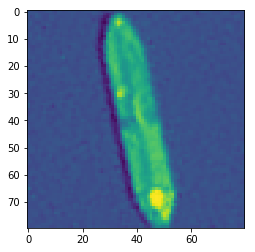

In [3]:
data_gray = [ color.rgb2gray(i) for i in data]
plt.imshow(data_gray[51])

In [6]:
ppc = 16
hog_images = []
hog_features = []
for image in data_gray:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualise=True)
    hog_images.append(hog_image)
    hog_features.append(fd)
print(fd.shape)
print(fd.ravel().shape)

D:\anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


(512,)
(512,)


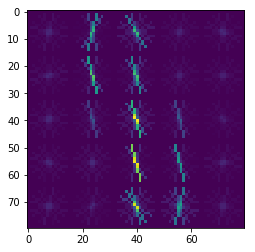

In [15]:
plt.imshow(hog_images[51])

In [16]:
labels =  np.array(dataset['labels']).reshape(len(dataset['labels']),1)

In [17]:
clf = svm.SVC()
hog_features = np.array(hog_features)
print(hog_features.shape)
data_frame = np.hstack((hog_features,labels))
print(data_frame.shape)
np.random.shuffle(data_frame)

(4000, 512)
(4000, 513)


In [18]:
percentage = 80
partition = int(len(hog_features)*percentage/100)
x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()

clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
y_pred = clf.predict(x_test)
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.89625


             precision    recall  f1-score   support

        0.0       0.89      0.98      0.93       580
        1.0       0.93      0.67      0.78       220

avg / total       0.90      0.90      0.89       800



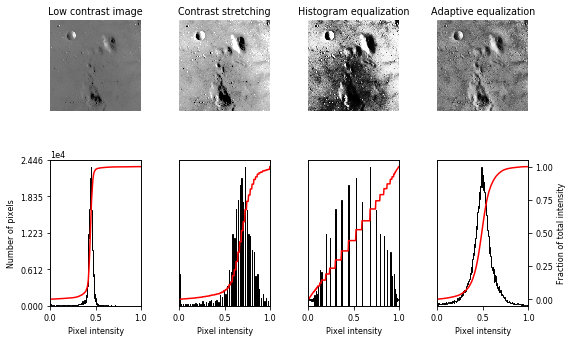

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """
    Plot an image along with its histogram and cumulative histogram.
    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()